# Visualización de árboles de decisión y Random Forest

En esta práctica vamos a construir con los datos de iris, usados en otras prácticas, un pequeño modelo de árboles de decisión y random forest para hacer la representación gráfica y comparar resultados

###  Importación de librerias

In [5]:
!pip install pydot
!pip install six

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

### 1) Carga de datos

Cargamos los ya conocidos datos de iris

In [7]:
iris = load_iris()

Separamos las variables X del target y

In [8]:
iris = load_iris();
X = iris.data;
y = iris.target;
y_names = iris.target_names;

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2) Separación train y test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
perc_values = [0.7, 0.15, 0.15];

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1);

Visualizamos el tamaño de los conjuntos de datos

In [13]:
print('Train data size = ' + str(X_train.shape))
print('Train target size = ' + str(y_train.shape))
print('Test data size = ' + str(X_test.shape))
print('Test target size = ' + str(y_test.shape))

Train data size = (105, 4)
Train target size = (105,)
Test data size = (45, 4)
Test target size = (45,)


### 3) Modelo

Definimos y entrenamos el árbol de decisión para clasificación

In [14]:
model = DecisionTreeClassifier(random_state = 1)
clf = model.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=1)

### 4) Visualización

Importamos la librería tree de sklearn que tiene funciones para visualización de árboles de decisión

In [15]:
from sklearn import tree


In [16]:
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier(random_state = 1)
clf = clf.fit(X, y)

1) Visualizamos con plot_tree con el modelo entrenado

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

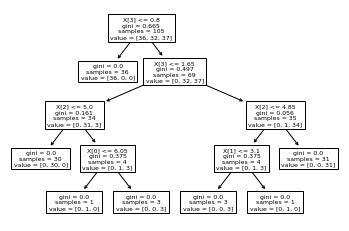

In [17]:
tree.plot_tree(model.fit(X_train, y_train)) 

El output será:
    
- Las reglas de decisión que componen el árbol junto con sus caracteríticas, por ejemplo el índice de gini, y el nnúmero de patrones de cada rama.

- Una representación gráfica de dicho árbol.

2) Como la primera representación no se ve muy bien existen otras funciones y librerias para representar árboles.

Importamos la libreria ghraphiv que nos sirve para visualizar árboles de decisión

In [19]:
import graphviz

Usamos la función export_graphviz de tree para la representación

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

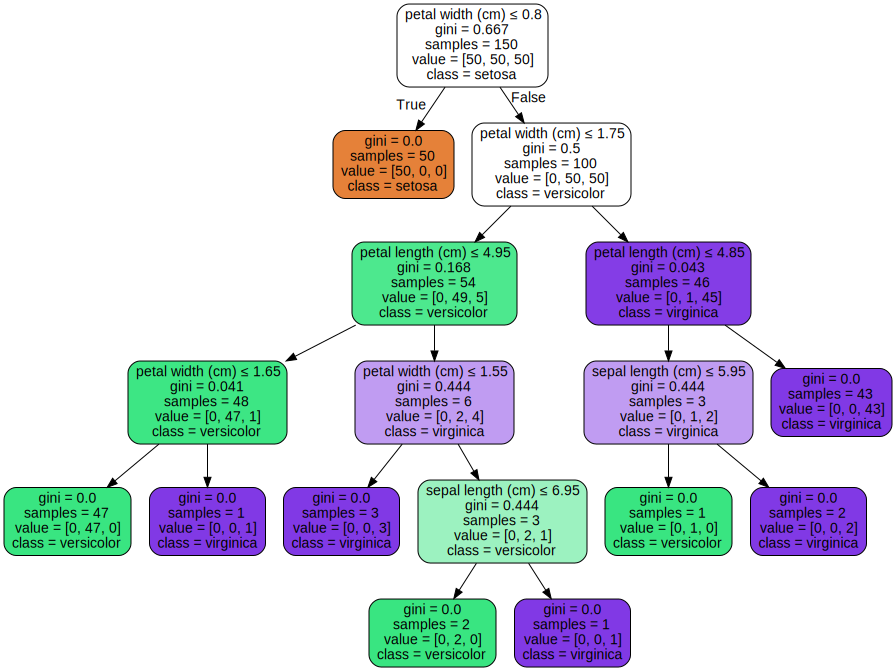

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

<img src='../figures/iris_tree.png' width="100%">

### Conclusiones de la representación gráfica


Nuestro nodo raíz será la variable petal width.

Lo ha dividido en la siguiente regla petal width <= 0,8 cm. Y se han creado 2 ramas o decisiones:

- TRUE: petal width <= 0,8 cm (aqui el árbol termina, indice de gini = 0)

- FALSE: petal width > 0,8 cm (aqui sigue creciendo)


También obtenemos datos del índice de gini, el número de patrones que tenemos en ese nodo (en este caso al ser el nodo raíz todos), los calores que toma y la clase que predice.

En el nodo hijo FALSE el árbol sigue iterando y creciendo, la siguiente variable elegida en AMS para la tomar la decisión es petal width de nuevo, petal width<= 1.75.

Siguiendo una lógica parecida a la anterior podemos explicar cada una de las reglas que ha seguido el modelo para explicar el resultado


### 5) Predicción

In [23]:
y_pred = model.predict(X_test)

Comprobamos las primeras predicciones

In [24]:
print(y_test[0:5])
print(y_pred[0:5])

[0 1 1 0 2]
[0 1 1 0 2]


### 6) Resultados y matriz de confusión

Importamos la libreria para hacer la matriz de confusión y el accuracy.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

In [26]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [27]:
acc(y_test, y_pred)

0.9555555555555556

### 7) Conclusiones

- Los árboles de decisión son fáciles de interpretar.

- No requieren normalización.

- Admiten variables categóricas.

- En este ejemplo funciona bien porque es un dataset muy sencillo

# Random Forest

- Random Forest es un algoritmo de aprendizaje supervisado que puede ser utilizado tanto para clasificación como para regresión.

- Es un ensemble de árboles de decisión. Por lo tanto, mejora los resultados de los árboles de decisión.

- Cuanto más árboles tiene más robusto es el algoritmo.

- Se crean árboles con un subconjunto aleatorio de los datos.

- Se hace la predicción de cada árbol y se selecciona el que más votos tiene.


### 1) Importación de datos de iris

In [24]:
iris = load_iris()

### 2) Modelo

Importamos de ensemble de skleran la libreria random Forest para clasificación

In [25]:
from sklearn.ensemble import RandomForestClassifier

Definimos el modelo

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state = 1)
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Entrenamos el modelo con los datos de iris, divididos en data (patrones) y en target

In [27]:
model.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Extraemos un solo árbol mediante estimators para poder representarlo, ya que como hemos visto random forest es un bosque de árboles y por tanto no sería posible su representación

In [28]:
estimator = model.estimators_[5]

### 3) Visualización: Representación gráfica de un árbol de RF

Representamos mediante la libreria export_graphviz uno de los árboles de RF obtenidos en estimator

In [29]:
dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("rfr_iris") 

'rfr_iris.pdf'

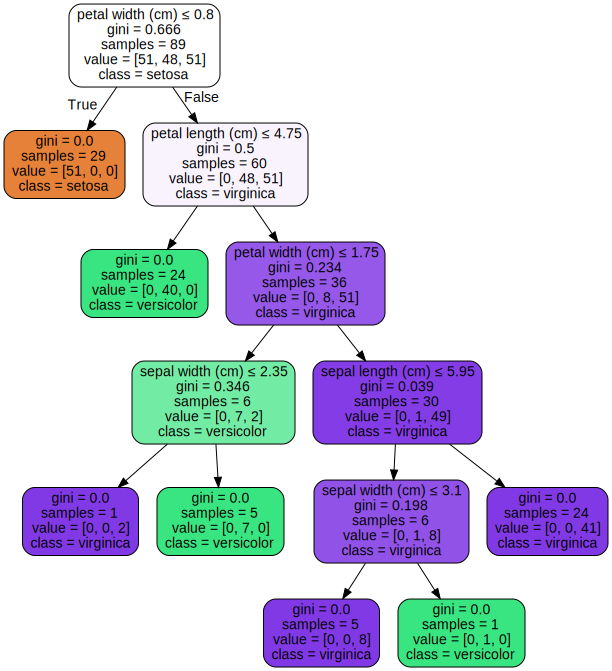

In [30]:
dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 4) Conclusiones de la representación gráfica


Nuestro nodo raíz será la variable petal width.

Lo ha dividido en la siguiente regla petal width <= 0,8 cm. Y se han creado 2 ramas o decisiones:
    
- **TRUE**: petal width <= 0,8 cm (aqui el árbol termina, indice de gini = 0)
    
- **FALSE**: petal width > 0,8 cm (aqui sigue creciendo)
        
También obtenemos datos del índice de gini, el número de patrones que tenemos en ese nodo (en este caso al ser el nodo raíz todos), los calores que toma y la clase que predice.

En el nodo hijo  **FALSE** el árbol sigue iterando y creciendo, la siguiente variable elegida en AMS para la tomar la decisión es petal length <= 4.75.

Siguiendo una lógica parecida a la anterior podemos explicar cada una de las reglas que ha seguido el modelo para explicar el resultado.



### 5) Predicción

In [31]:
y_pred = model.predict(X_test)

Comprobamos las primera predicciones

In [32]:
print(y_test[0:5])
print(y_pred[0:5])

[0 1 1 0 2]
[0 1 1 0 2]


### 6) Resultados

Importamos la libreria para hacer la matriz de confusión y el accuracy.

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

In [34]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [35]:
acc(y_test, y_pred)

1.0